# Case 1. Heart Disease Classification

#### Joonas Lehikoinen, Przemyslaw Zuchmanski
##### 31.01.2020
### Helsinki Metropolia University of Applied Sciences

The main object is to created and train a dense neural network to predict the presence of heart disease on the base of heart disease cleveland data downloaded from the site: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/ .<br><br><br><br>

## Data
The data contains values of various health factors usefull in detecting heart diseases. There are 13 factors described in 13 coluns. 14th column describes if the patint sufers from heart disease. The number of records is 303. Missing values (detected in 6 raws) were replaced with 0. 

In [15]:
%pylab inline
import pandas as pd
import numpy
from sklearn import preprocessing
import tensorflow as tf
from sklearn.model_selection import train_test_split


#names of columns
names = ["age","sex","cp","trestbps","chol","fbs","restecg",
                            "thalach","examg","oldpeak","slope","ca","thal","num"]
                   
#reading data and giving names for columns, detecting NaN valuess
df = pd.read_csv("processed.cleveland.data", 
                 names=names,
                     header=None, 
                     index_col = None, 
                     na_values = '?')

#replacing NaN values with 0
#df = df.replace(numpy.NaN,0)
df=df.dropna()
df.shape

Populating the interactive namespace from numpy and matplotlib


(297, 14)

Basic statistics are as follows

In [17]:
print('shape of data set: ', df.shape)
df.describe()

shape of data set:  (297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,examg,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Division data into two subsets: <br>
data - all health factors <br>
labels - indicate if the person is rather sick (1) or healthy (0)

In [18]:
#dividing set to data and labels
data = df.drop(['num'], axis=1)
#converting labels to binary atribute
label = 1.0*(df['num'] >0)
print(data)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  examg  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca  thal  
0      3.0  0.0   6.0  
1  

## Models and training
Dividing data. For training and validating we use 80% of samples. Remains 20% we will use for testing.

In [19]:
train_data, test_data, train_labels, test_labels = train_test_split(
                    data,
                    label,
                    test_size = 0.2,
                    random_state = 39,
                    shuffle = True)

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std
print(data)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  examg  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca  thal  
0      3.0  0.0   6.0  
1  

### Functions
in order to makes testing and showing the resuts easier we made functions

###### defineModel
Defining a the model. We use 20% of remaining data for validation. <br>
Function is build in such a way that it enables changes the main parameters such as number of layers, size of layers, activation list, regulizer, number of dropouts and optimizer when calling. <br>
Funcion also prints setup for easier testing.

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Activation, Flatten, Dropout, Dense, Embedding, TimeDistributed
from tensorflow.keras.callbacks import ModelCheckpoint
#from tensorflow.keras.utils import np_utils
from tensorflow.keras import regularizers

model=None
history = model

def defineModel(layers_num,neurons_list,activation_list,regualizer_list,dropout_num,optimizer_str):
    
    #Define use of global model parameter 
    global model
    model=None
    model = Sequential()
    
    #Define parameters
    LSTM_layer_num=3
    layer_size = neurons_list    
    activation_list=activation_list #softmax, tanh, sigmoid, linear    
    dropout=dropout_num
    model = Sequential()
    regularizer_list = regualizer_list
    
    #Compile parameters
    optimizer_par= optimizer_str #"adam", RMSprop
    metrics_par = "accuracy"
    loss_par="binary_crossentropy"
    

    # Define layers and parameters, printing for easier testing 
    
    print('''
        ********** NEURAL NETWORK STRUCTURE **********''')
    model.add(Dense(layer_size[0],name="Hidden1", input_shape =(13,),activation=activation_list[0],kernel_regularizer=regularizers.l2(regularizer_list[0])))
    model.add(Dropout(dropout))
    print(f'''
        Hidden Layer 1 - neurons: {layer_size[0]}, activation: {activation_list[0]}, regularizer: L2({regularizer_list[0]})
        Dropout - {dropout}''')
    
    
    if (layers_num>=2):
        model.add(Dense(layer_size[1],name="hidden2", activation=activation_list[1],kernel_regularizer=regularizers.l2(regularizer_list[1])))
        model.add(Dropout(dropout))
        print(f'''
        Hidden Layer 2 - neurons: {layer_size[1]}, activation: {activation_list[1]}, regularizer: L2({regularizer_list[1]})
        Dropout - {dropout}''')
        
        if (layers_num==3):
            
            model.add(Dense(layer_size[2],name="hidden3", activation=activation_list[2],kernel_regularizer=regularizers.l2(regularizer_list[2])))
            model.add(Dropout(dropout))
            print(f'''
        Hidden Layer 3 - neurons: {layer_size[1]}, activation: {activation_list[2]}, regularizer: L2({regularizer_list[2]})
        Dropout - {dropout}''')
    
    model.add(Dense(1,activation = "sigmoid",name="output"))
    
    #Compile model
    model.compile(loss = loss_par, optimizer = optimizer_par, metrics=[metrics_par])
          
          
    print(f'''
        Dense(output) - neurons: 1, activation: sigmoid)\n
        Optimizer: {optimizer_par}''')
    #print models layer information
    #model.summary() prints model info  

#### fitModel
Fitting model and storing data for testing.<br> 
Function is build in such a way that it enables changes the main parameters such as num of epochs and batch size.<br>
Each time the function is called check point with loss is saved in external file.

In [21]:
def fitModel(num_epo,batch):
    global model
    
    print(f'''
        Batch-size: {batch}
        epochs: {num_epo})
    ''')
    
    #Define callbacks and checkpoint (saves best model out of epochs based on monitored alue)
    checkpoint_name = 'DiseaseModel'
    checkpoint = ModelCheckpoint(checkpoint_name, monitor='loss', verbose = 0, save_best_only = True, mode ='min')#,patience=3
    callbacks_list = [checkpoint]  
    
      
    
    #Define parameters and Fit the model :
    global history
    model_params = {'epochs': num_epo,
                    'batch_size': batch,
                    'callbacks': callbacks_list,
                    'verbose': 0,
                    'validation_split': 0.20,
                    #'shuffle': True, #shuffle data during training
                   # 'initial_epoch': 1, # used when training old model futher
                    'steps_per_epoch': None,
                    'validation_steps': None}

    
    history=model.fit(train_data.values,
    train_labels.values,
    epochs = model_params['epochs'],
    batch_size = model_params['batch_size'],
    callbacks= model_params['callbacks'],
    verbose = model_params['verbose'],
    validation_split = model_params['validation_split'],   
                     )

#### plot
Plotting loss and accuracy vs time presented in epochs

In [22]:
def plot():
    # Plot the loss score and mean absolute error for both training and validation setss
    

    #collecting data from history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    mae = history.history['acc']
    val_mae = history.history['val_acc']
    
    #Cut first points of graph
    short_loss = loss[2:]
    short_val_loss = val_loss[2:]
    

    #defining time axis
    time = range(1,len(loss)+1)

    #ploting loss vs Epochs
    #loss of validation set is red
    plt.plot(range(1,len(short_loss)+1), short_loss, 'b-')
    #plt.plot(time, loss, 'b-')
    plt.plot(range(1,len(short_val_loss)+1), short_val_loss, 'r-')
    #plt.plot(time, val_loss, 'r-')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

    #ploting accuracy vs Epochs
    #accuracy of validation set is red
    
    #plt.plot(range(1,len(short_loss)+1), short_mae, 'b-')
    plt.plot(time, mae, 'b-')
    #plt.plot(range(1,len(short_val_loss)+1), short_val_mae, 'r-')
    plt.plot(time, val_mae, 'r-')
    plt.xlabel('Epochs')
    plt.ylabel('ACC')
    plt.show()

#### evaluate
Evaluate model and print results. Additionally the function returs the uotput of evaluation

In [23]:
def evaluate():
    score = model.evaluate(test_data.values, test_labels.values)
    
    print(f'''\n
*************  TEST RESULT  ******************
    \nLoss: {score[0]}\nAccuracy: {score[1]*100}\n
***********************************************''')
    
    #return score

#### loadWeights
Load previously saved model from computer

In [24]:
def loadWeights(weightFile):
    weights_file = weightFile # weights file path
    model.load_weights(weights_file)
    model.compile(loss = 'mse', optimizer = 'adam',metrics=['mae'])

## Results

##### Main tried combinations
Different kind of neural networks were tried on data sets and here is some findings from different models.
Parameters for each network can be found above graphs.

###### default values for testing:

********** NEURAL NETWORK STRUCTURE **********

Hidden Layer 1 - neurons: 13, activation: relu, regularizer: L2(0.005)
<br>Dropout - 0.1

Hidden Layer 2 - neurons: 13, activation: sigmoid, regularizer: L2(0.05)
<br>Dropout - 0.1

Hidden Layer 3 - neurons: 13, activation: relu, regularizer: L2(0.005)
<br>Dropout - 0.1)

output - neurons: 1, activation: sigmoid

Optimizer: adam

Batch-size: 4
    



### 13 neurons 1-3 hidden layers.

##### 1 Hidden Layer: 
model performed quite well with training and validation set till ~40-60 epochs with training and validaiting set according to the graphs. after that slight overrfitting. 120 epochs testing set gave 87% accuracy and 0.37 loss raiting. after trying different kind of amounts of epochs sweet spot for testing were between 60-80 epochs. Loss never raise above 0.40 and accuracy stayed between 87-90%. Reason for diffrering results were hidden layer which value was set 0.1. Model had 1x hidden layer.

increasing Dropout layers value to 0.2 made model to perform better most of the time on testing -> Loss: 0.33-0.35 accuracy: 90-93.4% 
Sometimes accuracy dropped to 88% but lossed stayed between earlier stated values

After setting epochs to 200 it seemed like model still performed quite well on testing data loss under 0.4 accuracy 88-90%. slight overfitting could be detected from the loss graph after ~100-125 epochs depending on the run time.

Best model: epochs 60, batch 4, dropout 0.2 , activation relu, regualizer L2 0.005, Optimizer Adam




        ********** NEURAL NETWORK STRUCTURE **********

        Hidden Layer 1 - neurons: 13, activation: relu, regularizer: L2(0.005)
        Dropout - 0.2

        Dense(output) - neurons: 1, activation: sigmoid)

        Optimizer: adam

        Batch-size: 4
        epochs: 60)
    


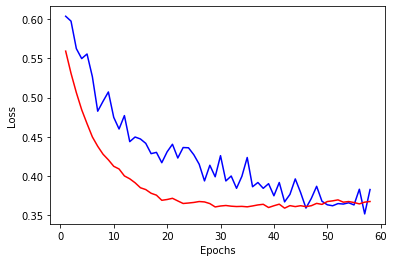

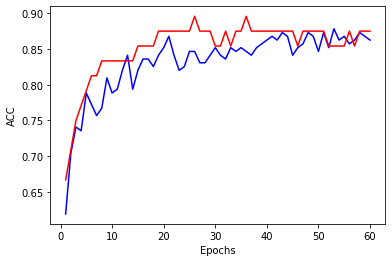

60/60 [==============================] - 0s 50us/sample - loss: 0.3818 - acc: 0.8167


*************  TEST RESULT  ******************
    
Loss: 0.38182435830434164
Accuracy: 81.66666626930237

***********************************************


In [25]:
#makeModel(layers_num, neurons_list[num], activation_list[str], regualzer_list[num], dropout_num, optimizer_str)
defineModel(1,[13],["relu"],[0.005],0.2,"adam")

#fitModel(epochs_num,batch_num)
fitModel(60,4)
plot()

#Evaluate
evaluate()

##### 2 layers:
First tested with 120 epochs and noticed from the graphs that validaiting set accuracy gets higher than training set accuracy after ~45-60 epochs. loss on validating accuracy gets slightly higher than training --> overfit?

dropped epochs to 60 and noticed graph looked nice no over or underfitting and test results were: Loss 0.38, Accuracy 92%.
This meant model was performing well. Multiple runs on these parameters were done and model performed stable way. In testing Loss between 0.36-0.39 and accuracy 89-92% no over or underfitting detected.

Best model: epochs 60, batch 4, dropout 0.1, activation relu on both layers, regualizer on first layer L2 (0.005), regualizer on second layer L2 (0.05), Optimizer Adam



        ********** NEURAL NETWORK STRUCTURE **********

        Hidden Layer 1 - neurons: 13, activation: relu, regularizer: L2(0.005)
        Dropout - 0.2

        Hidden Layer 2 - neurons: 13, activation: relu, regularizer: L2(0.05)
        Dropout - 0.2

        Dense(output) - neurons: 1, activation: sigmoid)

        Optimizer: Adam

        Batch-size: 64
        epochs: 400)
    


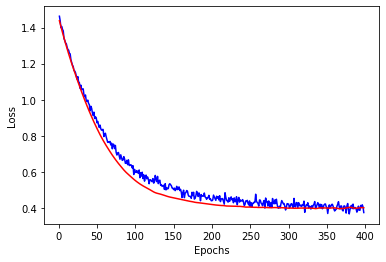

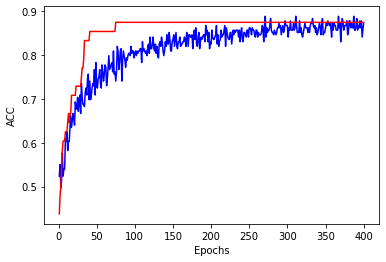

60/60 [==============================] - 0s 83us/sample - loss: 0.4279 - acc: 0.8333


*************  TEST RESULT  ******************
    
Loss: 0.427892929315567
Accuracy: 83.33333134651184

***********************************************


In [31]:
#makeModel(layers_num, neurons_list[num], activation_list[str], regualzer_list[num], dropout_num, optimizer_str)
defineModel(2,[13,13],["relu","relu"],[0.005,0.05],0.2,"Adam")

#fitModel(epochs_num,batch_num)
fitModel(400,64)
plot()

#Evaluate
evaluate()

##### 3 layers:

Tested with 150 epochs detected Under fitting from graphs after 40-60 epochs depending on the run time -> training loss < validaiting loss.

dropped epochs to 50 no more over or under fitting but performed quite bad compared to two previous models. Testing Loss stayed over 0.40 and accuracy did jump between 86-88%.

increased epochs to 60 and batch size to 6 didn't make any noticable changes on results. lost value stayed over 0.40 in testing. 

Increased batch size to 120 and dropout layer to 0.2 made noticable difference in results.

increased dropout to 0.4 results still same.

changed second hidden layers activation to softmax and it made results worse. testing loss 0.5-0.7. same thing happened when activation on all of the layers were replaced by it.

activations were set on relu, sigmoid, relu. no noticable over/under fitting detected on 120 epochs. increased epochs to 200 and noticed high jump on accuracy after 50 epochs -> 45%->80%

dropped epochs to 85 and gettin weird results accuracy jumping between 45-85%. this is probably cause of the nature of sigmond function (value between 0 & 1, good for output). Increasing epochs to 150 and dropping batch size to 4. Testing accuracy jump to 88-91% and loss drops to 0.45-48.

increasing epochs to 250 -> testing Loss 0.43, accuracy 92%. now possible underfitting can be seen from the loss graph after 40~ epochs.



        ********** NEURAL NETWORK STRUCTURE **********

        Hidden Layer 1 - neurons: 13, activation: relu, regularizer: L2(0.01)
        Dropout - 0.3

        Hidden Layer 2 - neurons: 13, activation: relu, regularizer: L2(0.03)
        Dropout - 0.3

        Hidden Layer 3 - neurons: 13, activation: relu, regularizer: L2(0.01)
        Dropout - 0.3

        Dense(output) - neurons: 1, activation: sigmoid)

        Optimizer: adam

        Batch-size: 13
        epochs: 20)
    


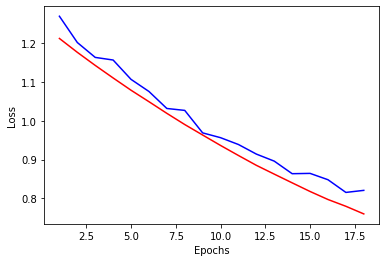

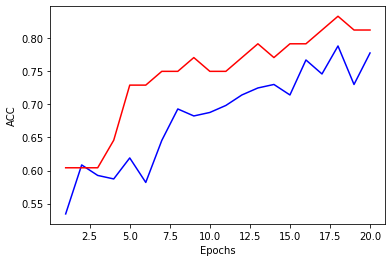

60/60 [==============================] - 0s 83us/sample - loss: 0.7394 - acc: 0.8333


*************  TEST RESULT  ******************
    
Loss: 0.7394195795059204
Accuracy: 83.33333134651184

***********************************************


In [49]:
#makeModel(layers_num, neurons_list[num], activation_list[str], regualzer_list[num], dropout_num, optimizer_str)
defineModel(3,[13,13,13],["relu","relu","relu"],[0.01,0.03,0.01],0.3,"adam")

#fitModel(epochs_num,batch_num)
fitModel(20,13)
plot()

#Evaluate
evaluate()

### 400 neurons 1 hidden layer:

When we used 400 neurons on each hidden layers:

##### 1 hidden layer:

seemed to perform very poorly after 15-20 epochs when we looked on graph. It started to overfit after 15 epochs so we tried to finetune the model by dropping the epochs to 15. Results were quite suprising because now model performed on same level as earlier good models. Also training time was very short when using 15 epochs.


In [ ]:
#makeModel(layers_num, neurons_list[num], activation_list[str], regualzer_list[num], dropout_num, optimizer_str)
defineModel(1,[400],["relu"],[0.005],0.1,"adam")

#fitModel(epochs_num,batch_num)
fitModel(100,4)
plot()

#Evaluate
evaluate()


        ********** NEURAL NETWORK STRUCTURE **********

        Hidden Layer 1 - neurons: 256, activation: elu, regularizer: L2(0.1)
        Dropout - 0.2

        Dense(output) - neurons: 1, activation: sigmoid)

        Optimizer: adamax

        Batch-size: 64
        epochs: 120)
    


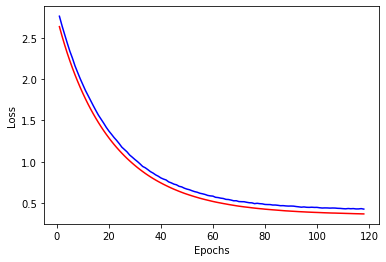

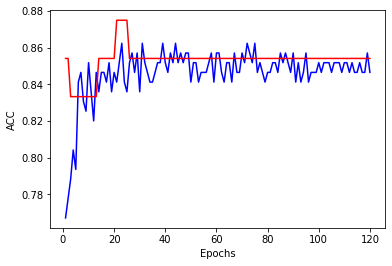

60/60 [==============================] - 0s 399us/sample - loss: 0.4335 - acc: 0.8500


*************  TEST RESULT  ******************
    
Loss: 0.43351431091626486
Accuracy: 85.00000238418579

***********************************************


In [102]:
#makeModel(layers_num, neurons_list[num], activation_list[str], regualzer_list[num], dropout_num, optimizer_str)
defineModel(1,[256],["elu"],[0.1],0.2,"adamax")

#fitModel(epochs_num,batch_num)
fitModel(120,64)
plot()

#Evaluate
evaluate()


        ********** NEURAL NETWORK STRUCTURE **********

        Hidden Layer 1 - neurons: 128, activation: elu, regularizer: L2(0.05)
        Dropout - 0.2

        Dense(output) - neurons: 1, activation: sigmoid)

        Optimizer: adamax

        Batch-size: 16
        epochs: 100)
    


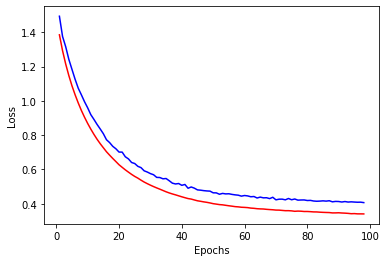

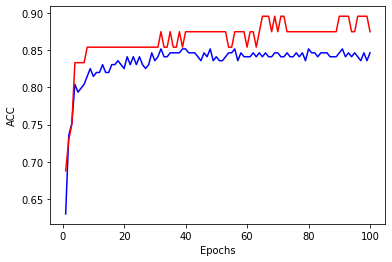

60/60 [==============================] - 0s 133us/sample - loss: 0.4120 - acc: 0.8500


*************  TEST RESULT  ******************
    
Loss: 0.4120318075021108
Accuracy: 85.00000238418579

***********************************************


In [110]:
#makeModel(layers_num, neurons_list[num], activation_list[str], regualzer_list[num], dropout_num, optimizer_str)
defineModel(1,[128],["elu"],[0.05],0.2,"adamax")

#fitModel(epochs_num,batch_num)
fitModel(100,16)
plot()

#Evaluate
evaluate()

### 52 neurons 1 hidden layer:

Model Performed quite well with 0.4 dropout layer in given situation on test data. it was fast and accurate. low loss and high accuracy


        ********** NEURAL NETWORK STRUCTURE **********

        Hidden Layer 1 - neurons: 24, activation: relu, regularizer: L2(0.05)
        Dropout - 0.2

        Dense(output) - neurons: 1, activation: sigmoid)

        Optimizer: adam

        Batch-size: 2
        epochs: 50)
    


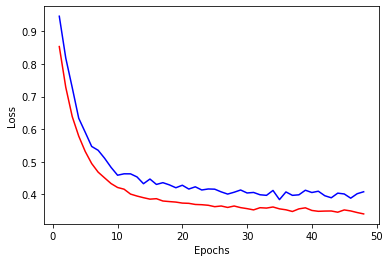

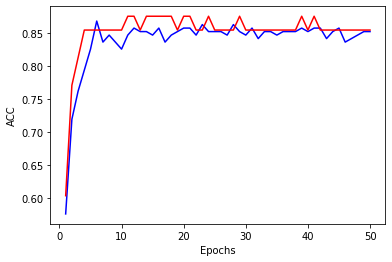

60/60 [==============================] - 0s 100us/sample - loss: 0.3994 - acc: 0.8333


*************  TEST RESULT  ******************
    
Loss: 0.3994153400262197
Accuracy: 83.33333134651184

***********************************************


In [54]:
#makeModel(layers_num, neurons_list[num], activation_list[str], regualzer_list[num], dropout_num, optimizer_str)
defineModel(1,[24],["relu"],[0.05],0.2,"adam")

#fitModel(epochs_num,batch_num)
fitModel(50,2)
plot()

#Evaluate
evaluate()


        ********** NEURAL NETWORK STRUCTURE **********

        Hidden Layer 1 - neurons: 13, activation: relu, regularizer: L2(0.2)
        Dropout - 0.01

        Hidden Layer 2 - neurons: 6, activation: relu, regularizer: L2(0.2)
        Dropout - 0.01

        Dense(output) - neurons: 1, activation: sigmoid)

        Optimizer: adam

        Batch-size: 4
        epochs: 20)
    


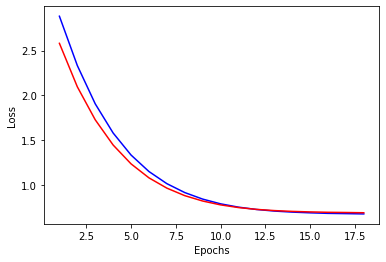

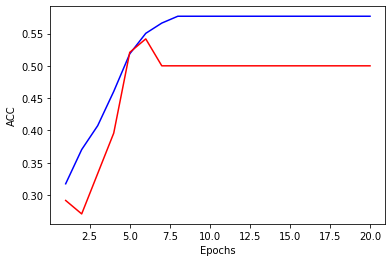

60/60 [==============================] - 0s 133us/sample - loss: 0.7093 - acc: 0.4500


*************  TEST RESULT  ******************
    
Loss: 0.7093348582585652
Accuracy: 44.999998807907104

***********************************************


In [89]:
#makeModel(layers_num, neurons_list[num], activation_list[str], regualzer_list[num], dropout_num, optimizer_str)
defineModel(2,[13,6],["relu","relu"],[0.2,0.2],0.01,"adam")

#fitModel(epochs_num,batch_num)
fitModel(20,4)
plot()

#Evaluate
evaluate()

### conclusion:

1-2 hidden layers is best option for the given data set. 3rd hidden layer makes optimization harder and might be over kill for given problem with only ~300 samples of data.

bigger models tends to overfit quite easly.

time/performance-wise would be best to use 1 layer model. From the tests we noticed that accuracy wouldn't rise above 93% with any different models. 




#### Additional results with different parameters:

## 1:    
    
    ***********************************************************************************
    Layers: 
 
    Dense1 - neurons: 68, activation: relu, regularizer: L2(0.1)

    Dropout - 0.4

    Dense2 - neurons: 68, activation: relu, regularizer: L2(0.1)

    Dropout - 0.4

    Dense(output) - neurons: 1)
    
    Optimizer:adam
    
    Batch-size: 10
    epochs: 250
    ***********************************************************************************  
    
    Result:
    
    Loss: 0.42949211988292757
    Accuracy: 91.80327653884888


## 2:    
    ***********************************************************************************
    Layers: 
 
    Dense1 - neurons: 68, activation: relu, regularizer: L2(0.1)

    Dropout - 0.4

    Dense2 - neurons: 68, activation: relu, regularizer: L2(0.1)

    Dropout - 0.4

    Dense(output) - neurons: 1)
    
    Optimizer:adam
    
    Batch-size:4
    epochs: 250
    ***********************************************************************************
    
    Result:

    Loss: 0.3861997435327436
    Accuracy: 91.80327653884888

## 3:
    
    ***********************************************************************************
    Layers: 
 
    Dense1 - neurons: 84, activation: relu, regularizer: L2(0.05)

    Dropout - 0.4

    Dense2 - neurons: 84, activation: relu, regularizer: L2(0.1)

    Dropout - 0.4

    Dense(output) - neurons: 1)
    
    Optimizer: adam
    
    Batch-size: 4
    epochs: 115
    ***********************************************************************************
    
    
    TEST RESULT:
    
    Loss: 0.40598516874626034
    Accuracy: 86.8852436542511

    ***********************************************
    

## 4:
    
    ***********************************************************************************
    Layers: 
 
    Dense1 - neurons: 84, activation: relu, regularizer: L2(0.05)

    Dropout - 0.4

    Dense2 - neurons: 84, activation: relu, regularizer: L2(0.1)

    Dropout - 0.4

    Dense(output) - neurons: 1)
    
    Optimizer: adam
    
    Batch-size: 4
    epochs: 65
    ***********************************************************************************
    
    *************  TEST RESULT  ******************
    
    Loss: 0.406089111429746
    Accuracy: 90.16393423080444

    ***********************************************

## 5:

    ***********************************************************************************
    Layers: 
 
    Dense1 - neurons: 84, activation: relu, regularizer: L2(0.05)

    Dropout - 0.4

    Dense2 - neurons: 84, activation: relu, regularizer: L2(0.1)

    Dropout - 0.4

    Dense(output) - neurons: 1)
    
    Optimizer: adam
    
    Batch-size: 4
    epochs: 10
    ***********************************************************************************
    
    *************  TEST RESULT  ******************
    
    Loss: 0.5175350904464722
    Accuracy: 90.16393423080444

    ***********************************************

## 6:

    ***********************************************************************************
    Layers: 
 
    Dense1 - neurons: 16, activation: relu, regularizer: L2(0.05)

    Dropout - 0.4

    Dense2 - neurons: 16, activation: relu, regularizer: L2(0.1)

    Dropout - 0.4

    Dense(output) - neurons: 1)
    
    Optimizer: adam
    
    Batch-size: 4
    epochs: 150
    ***********************************************************************************
    
    *************  TEST RESULT  ******************
    
    Loss: 0.39709243178367615
    Accuracy: 90.16393423080444

    ***********************************************

## 7:

    ***********************************************************************************
    Layers: 
 
    Dense1 - neurons: 16, activation: relu, regularizer: L2(0.05)

    Dropout - 0.2

    Dense2 - neurons: 16, activation: relu, regularizer: L2(0.1)

    Dropout - 0.2

    Dense(output) - neurons: 1)
    
    Optimizer: adam
    
    Batch-size: 4
    epochs: 200
    ***********************************************************************************
    
    *************  TEST RESULT  ******************
    
    Loss: 0.3838785530113783
    Accuracy: 90.16393423080444
    
    ***********************************************

## 8:
    ***********************************************************************************
    Layers: 
 
    Dense1 - neurons: 16, activation: relu, regularizer: L2(0.05)

    Dropout - 0.4

    Dense2 - neurons: 8, activation: relu, regularizer: L2(0.1)

    Dropout - 0.4

    Dense(output) - neurons: 1, activation: sigmoint)
    
    Optimizer: adam
    
    Batch-size: 4
    epochs: 500
    ***********************************************************************************
    
    *************  TEST RESULT  ******************

    Loss: 0.39709243178367615
    Accuracy: 90.16393423080444

    ***********************************************

## 9:

    ***********************************************************************************
    Layers: 
 
    Dense1 - neurons: 13, activation: relu, regularizer: L2(0.005)

    Dropout - 0.2

    Dense2 - neurons: 5, activation: relu, regularizer: L2(0.005)

    Dropout - 0.2
    
    Dense2 - neurons: 5, activation: relu, regularizer: L2(0.005)

    Dropout - 0.2


    Dense(output) - neurons: 1)
    
    Optimizer: adam
    
    Batch-size: 4
    epochs: 100
    ***********************************************************************************
    
    *************  TEST RESULT  ******************
    
    Loss: 0.3525885934712457
    Accuracy: 85.24590134620667

    ***********************************************

## 10:

    ***********************************************************************************
    Layers: 
 
    Dense1 - neurons: 13, activation: relu, regularizer: L2(0.005)

    Dropout - 0.2

    Dense2 - neurons: 13, activation: relu, regularizer: L2(0.05)

    Dropout - 0.2

    Dense(output) - neurons: 1)
    
    Optimizer: adam
    
    Batch-size: 4
    epochs: 150
    ***********************************************************************************
    
    *************  TEST RESULT  ******************
    
    Loss: 0.3697339247484676
    Accuracy: 88.52459192276001

    ***********************************************

## 11:

    ***********************************************************************************
    Layers: 
 
    Dense1 - neurons: 13, activation: relu, regularizer: L2(0.005)

    Dropout - 0.1

    Dense2 - neurons: 9, activation: relu, regularizer: L2(0.005)

    Dropout - 0.1

    Dense(output) - neurons: 1, activation: sigmoid)
    
    Optimizer: adam
    
    Batch-size: 2
    epochs: 50
    ***********************************************************************************
    
    *************  TEST RESULT  ******************
    
    Loss: 0.35020713337132187
    Accuracy: 90.16393423080444

    ***********************************************